
# Investigating No-Show-appointments Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> **primary info about the dataset**: like the number of samples, sample of the data, the data types and whether there a duplicated rows or missing data


In [2]:
# Loading the data
row_data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
row_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
row_data.shape

(110527, 14)

In [5]:
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## The day is string need to be changed to datetime
## PatientId need to be changed to int 

In [6]:
row_data.duplicated().sum()

0

In [7]:
row_data.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

**There is no missing data and no duplicated rows**

In [8]:
row_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




### Data Cleaning 
- changing the data types to appropriate format
- deleting wrong values

In [9]:
row_data['ScheduledDay'] = pd.to_datetime(row_data['ScheduledDay'])

In [10]:
row_data['AppointmentDay'] = pd.to_datetime(row_data['AppointmentDay'])

In [11]:
# making sure that the types changed to datetime
row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [12]:
row_data['PatientId'] = row_data['PatientId'].astype(int)

In [13]:
row_data.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5574942418928,5780122,F,2016-06-07 07:38:34+00:00,2016-06-07 00:00:00+00:00,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,72633149253362,5630375,F,2016-04-27 15:15:06+00:00,2016-06-07 00:00:00+00:00,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,65423877893936,5630447,F,2016-04-27 15:23:14+00:00,2016-06-07 00:00:00+00:00,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,996997666245785,5650534,F,2016-05-03 07:51:47+00:00,2016-06-07 00:00:00+00:00,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,36355337746436,5651072,F,2016-05-03 08:23:40+00:00,2016-06-07 00:00:00+00:00,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
row_data['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

## There is a -1 in the age which need to be dropped

In [15]:
row_data.drop(index=row_data[row_data['Age'] == -1].index, axis=0, inplace=True)
# check for correctness
row_data[row_data['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<a id='eda'></a>
## Exploratory Data Analysis


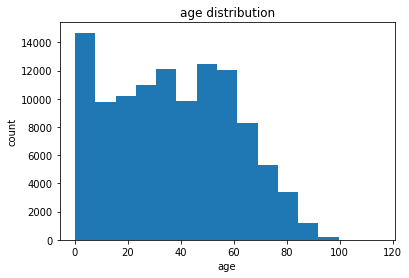

In [16]:
plt.hist(row_data['Age'], bins=15)
plt.xlabel('age')
plt.ylabel('count')
plt.title('age distribution');

## Data has good age distribution, No need to be normally distributed 

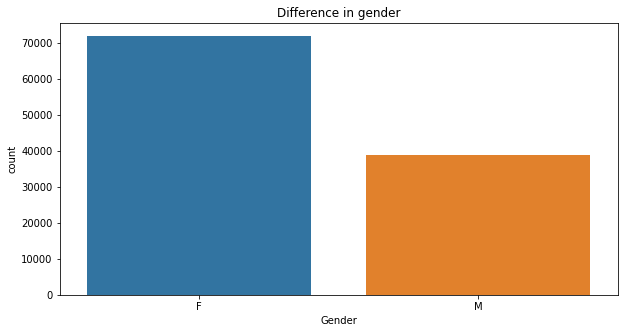

In [17]:
plt.figure(figsize=(10,5))
plt.title("Difference in gender")
sns.countplot(data=row_data,x='Gender');

## There is about 30000 difference in gender

# Does handcap affect the showing chance?

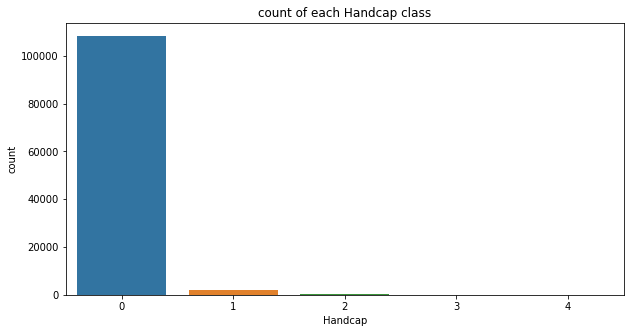

In [18]:
plt.figure(figsize=(10,5))
plt.title('count of each Handcap class')
sns.countplot(data=row_data,x='Handcap');

## we see that about 97% of the data not handcap, so this col barly makes any difference

# whar about alcohol?

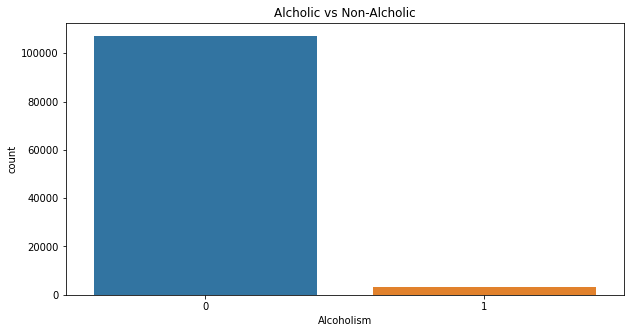

In [19]:
plt.figure(figsize=(10,5))
plt.title('Alcholic vs Non-Alcholic')
sns.countplot(data=row_data,x='Alcoholism');

## Same as Handcap the majority is not alcoholic

# Any interesting correlations?

In [20]:
row_data['No-show'].unique()

array(['No', 'Yes'], dtype=object)

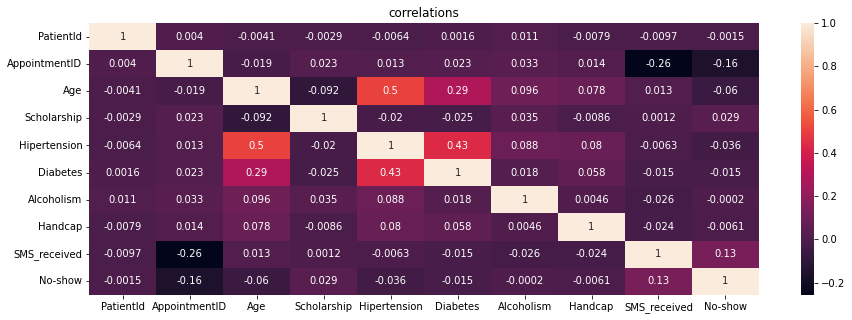

In [21]:
plt.figure(figsize=(15,5))
plt.title('correlations')
row_data['No-show'] = row_data['No-show'].map({'Yes': 1, 'No': 0})
sns.heatmap(row_data.corr(),annot=True);

## Nothing interesting in correlations but week corrlation between the sms and showing up

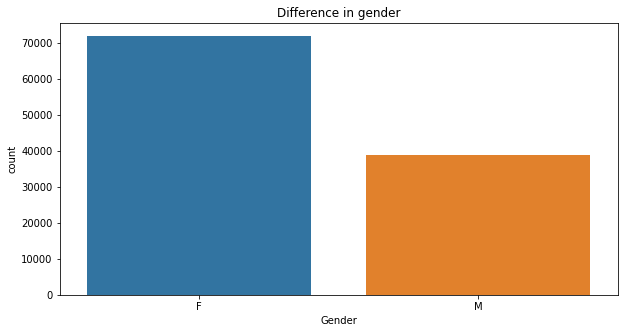

In [22]:
plt.figure(figsize=(10,5))
plt.title('Difference in gender')
sns.countplot(data=row_data,x='Gender');

# How the time between the scedule and the appintment affect the showing up chance?

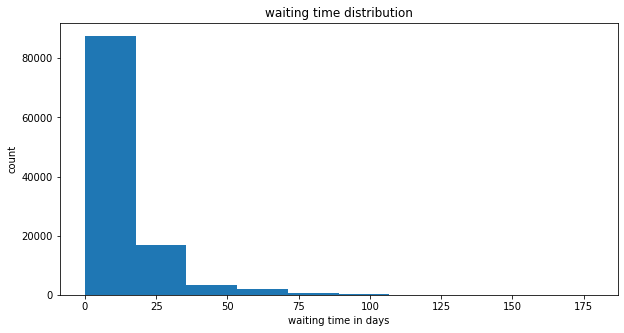

In [23]:
plt.figure(figsize=(10,5))
plt.hist(abs(row_data.AppointmentDay - row_data.ScheduledDay).apply(lambda x:x.days))
plt.xlabel("waiting time in days")
plt.ylabel("count")
plt.title('waiting time distribution');

## the distribution is laft skewed which means that the majority waiting time is small

In [24]:
# add new col to see if there is a correlation
row_data['waiting_time'] = abs(row_data.AppointmentDay - row_data.ScheduledDay).apply(lambda x:x.days)

In [25]:
row_data['waiting_time'].corr(row_data['No-show'])

0.18008418661015524

### positive correlation but not strong

<a id='conclusions'></a>
## Conclusions

> we see that some features have no effect due to the skewness of the data i.e the majority of the data is not alcoholic people and not handcap

> people are more likely to go to the appointment if the date is not too far away

> Also seems like the sms reminds people as there is a positive correlation but not always
